## Task-1 Prediction using Supervised ML

### Author: Stephine Eliza Varghese
## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the data

In [2]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data science\Book1.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Create the regression

### Dependent and independent variables

In [4]:
x=data['Hours']
y=data['   Scores']

### Explore the data

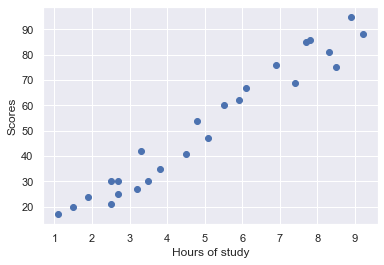

In [5]:
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

In [6]:
##Reshapping the values
x1=x.values.reshape(-1,1)
print(x1)
y1=y.values.reshape(-1,1)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=365)

### Linear regression model building

In [8]:
reg = LinearRegression()
reg.fit(x1_train,y1_train)
print("Training complete.")

Training complete.


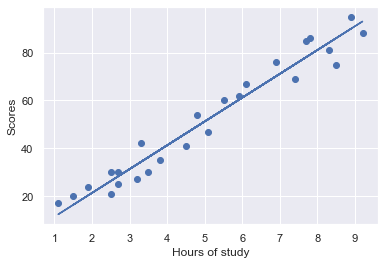

In [9]:
y2=reg.intercept_+ reg.coef_*x1
plt.scatter(x1,y1)
plt.plot(x1,y2)
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

## Model prediction and evaluation

In [10]:
y1_pred = reg.predict(x1_test) 
reg_summary = pd.DataFrame(data = x1_test, columns=['Hours'])
reg_summary['Target']=y1_test
reg_summary ['Prediction'] = y1_pred
reg_summary

,Hours,Target,Prediction
0,3.8,35,39.259780
1,1.9,24,20.340334
2,6.9,76,70.128349
3,7.4,69,75.107151
4,1.1,17,12.374251


In [11]:
reg_summary['Residual'] = reg_summary['Target'] - reg_summary['Prediction']
reg_summary['Difference%'] = np.absolute(reg_summary['Residual']/reg_summary['Target']*100)
reg_summary

,Hours,Target,Prediction,Residual,Difference%
0,3.8,35,39.259780,-4.259780,12.170799
1,1.9,24,20.340334,3.659666,15.248610
2,6.9,76,70.128349,5.871651,7.725856
3,7.4,69,75.107151,-6.107151,8.850943
4,1.1,17,12.374251,4.625749,27.210287


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y1_test, y1_pred)) 

Mean Absolute Error: 4.904799258483659


### What will be the score of the student if he/she studies a total of 9.5 hours?

In [13]:
hours = 9.25
own_pred = reg.predict([[hours]]).round(2)[0]
print("If the student invests a total of {} hours then his/her score = {}".format(hours,own_pred),"%")

If the student invests a total of 9.25 hours then his/her score = [93.53] %
